<a href="https://colab.research.google.com/github/MagdalenaBra/ML-and-DL/blob/main/14_Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1: Installation and setup

In [3]:
! pip install -q tensorflow

In [4]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2: Importing the dataset

In [6]:
# Installing kaggle API
! pip install -q kaggle

In [7]:
# create a directory as kaggle
! mkdir -p ~/.kaggle

In [8]:
# Import API key to google colab
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [9]:
# copy API key to kaggle directory
! cp kaggle.json ~/.kaggle/

In [10]:
# disable API key
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
# list of datasets
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                  146KB  2023-10-05 06:45:37           5390        131  1.0              
nelgiriyewithana/top-spotify-songs-2023                     Most Streamed Spotify Songs 2023                   47KB  2023-08-26 11:04:57          32796        986  1.0              
nelgiriyewithana/credit-card-fraud-detection-dataset-2023   Credit Card Fraud Detection Dataset 2023          143MB  2023-09-18 10:00:19           5710        195  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Datase

In [12]:
# importing the dataset
! kaggle datasets download -d tongpython/cat-and-dog

 94% 204M/218M [00:00<00:00, 244MB/s]
100% 218M/218M [00:00<00:00, 248MB/s]


In [13]:
# unzip the dataset
! unzip -q /content/cat-and-dog.zip

# 3: Building the model

In [14]:
# create an object (Initizile CNN)

model = tf.keras.models.Sequential()

In [15]:
# First CNN layer (input)
# 1) filters = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = relu
# 5) input shape =(32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape = [32, 32, 3]))


In [16]:
# Maxpool layer
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [17]:
# Second CNN layer and maxpool layer

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))


model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [18]:
# Flattening layer

model.add(tf.keras.layers.Flatten())

In [19]:
# Dropout layer

model.add(tf.keras.layers.Dropout(0.4))

In [20]:
# Fully connected layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))


In [21]:
# Output layer

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [22]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4: Fitting CNN to images

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [25]:
# Rescale images

datagen = ImageDataGenerator(rescale=1./255)

In [26]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size = 20)

test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size = 20)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [27]:
len(training_set), len(test_set)

(401, 102)

In [28]:
len(training_set) *20, len(test_set) *20

(8020, 2040)

In [29]:
test_set.batch_size

20

In [30]:
history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)

Epoch 1/20


<ipython-input-30-2b34cd491ee1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)


401/401 [==============================] - 39s 95ms/step - loss: 0.6683 - accuracy: 0.5799 - val_loss: 0.6328 - val_accuracy: 0.6347
Epoch 2/20
401/401 [==============================] - 34s 85ms/step - loss: 0.6040 - accuracy: 0.6738 - val_loss: 0.6226 - val_accuracy: 0.6372
Epoch 3/20
401/401 [==============================] - 36s 90ms/step - loss: 0.5762 - accuracy: 0.6982 - val_loss: 0.5562 - val_accuracy: 0.7355
Epoch 4/20
401/401 [==============================] - 35s 88ms/step - loss: 0.5205 - accuracy: 0.7368 - val_loss: 0.5746 - val_accuracy: 0.6817
Epoch 5/20
401/401 [==============================] - 37s 92ms/step - loss: 0.4930 - accuracy: 0.7621 - val_loss: 0.5150 - val_accuracy: 0.7543
Epoch 6/20
401/401 [==============================] - 36s 90ms/step - loss: 0.4587 - accuracy: 0.7846 - val_loss: 0.4959 - val_accuracy: 0.7632
Epoch 7/20
401/401 [==============================] - 34s 85ms/step - loss: 0.4333 - accuracy: 0.7990 - val_loss: 0.4881 - val_accuracy: 0.7647
Epo

# 5: Plotting the learning curve

In [33]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()


  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

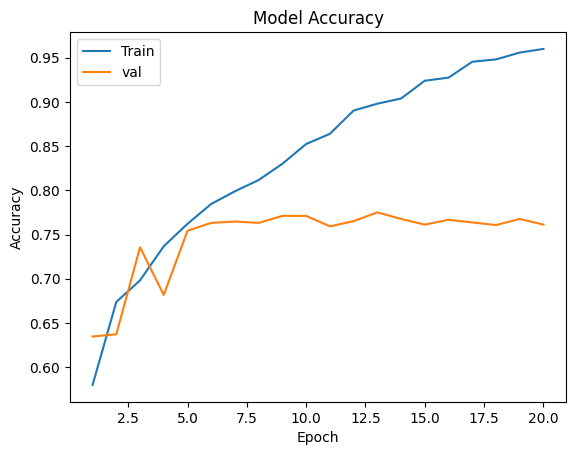

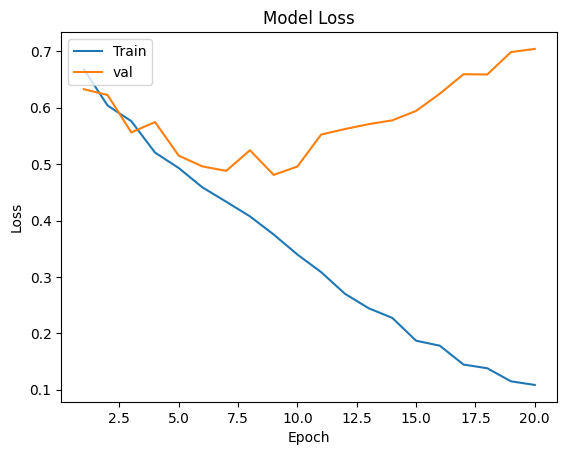

In [34]:
learning_curve(history, 20)